# Deep Learning with Python by FRANÇOIS CHOLLET

All of this book’s code examples use the Keras deep-learning framework (https://keras.io), which is open source and free to download.

You’ll need access to a UNIX machine; it’s possible to use Windows, too, but I don’t recommend it.

I also recommend that you have a recent NVIDIA GPU on your machine, such as a TITAN X. This isn’t required, but it will make your experience better by allowing you to run the code examples several times faster. 

If you don’t have access to a local workstation with a recent NVIDIA GPU, you can use a cloud environment, instead. In particular, you can use Google Cloud instances (such as an n1-standard-8 instance with an NVIDIA Tesla K80 add-on) or Amazon Web Services (AWS) GPU instances (such as a p2.xlarge instance).

Appendix B presents in detail one possible cloud workflow that runs an AWS instance via Jupyter notebooks, accessible in your browser.

All code examples in this book are available for download as Jupyter notebooks from the book’s website, www.manning.com/books/deep-learning-with-python, and on GitHub at https://github.com/fchollet/deep-learning-with-python-notebooks.

## Chapter 1: What is Deep Learning? 

<img src="Screen Shot 2020-09-28 at 6.34.19 AM.png">

### Artificial Intelligence: A concise definition of the field would be as follows: the effort to automate intellectual tasks normally performed by humans.

A machine-learning system is trained rather than explicitly programmed.

### Machine learning, and especially deep learning, exhibits comparatively little mathematical theory—maybe too little—and is engineering oriented.

Therefore, the central problem in machine learning and deep learning is to meaningfully transform data: in other words, to learn useful representations of the input data at hand—representations that get us closer to the expected output.

Before we go any further: what’s a representation? 
- At its core, it’s a different way to look at data—to represent or encode data. 
- For instance, a color image can be encoded in the RGB format (red-green-blue) or in the HSV format (hue-saturation-value): these are two different representations of the same data. 
- Machine-learning models are all about finding appropriate representations for their input data—transformations of the data that make it more amenable to the task at hand, such as a classification task.

All machine-learning algorithms consist of automatically finding such transformations that turn data into more-useful representations for a given task. 

So that’s what machine learning is, technically: searching for useful representations of some input data, within a predefined space of possibilities, using guidance from a feedback signal. 

### The “deep” in deep learning

Deep learning is a specific subfield of machine learning: a new take on learning representations from data that puts an emphasis on learning successive layers of increasingly meaningful representations. 

How many layers contribute to a model of the data is called the depth of the model.

Modern deep learning often involves tens or even hundreds of successive layers of representations— and they’re all learned automatically from exposure to training data.

In deep learning, these layered representations are (almost always) learned via models called neural networks, structured in literal layers stacked on top of each other.

Let’s examine how a network several layers deep (see figure 1.5) transforms an image of a digit in order to recognize what digit it is.

<img src="Screen Shot 2020-09-28 at 6.43.31 AM.png">

As you can see in figure 1.6, the network transforms the digit image into representations that are increasingly different from the original image and increasingly informative about the final result. 

You can think of a deep network as a multistage
information-distillation operation, where information goes through successive filters
and comes out increasingly purified (that is, useful with regard to some task).

<img src="Screen Shot 2020-09-28 at 6.43.40 AM.png">

###  Understanding how deep learning works, in three figures

At this point, you know that machine learning is about mapping inputs (such as images) to targets (such as the label “cat”), which is done by observing many examples of input and targets. You also know that deep neural networks do this input-to-target mapping via a deep sequence of simple data transformations (layers) and that these data transformations are learned by exposure to examples. 

The specification of what a layer does to its input data is stored in the layer’s weights, which in essence are a bunch of numbers.  In technical terms, we’d say that the transformation implemented by a layer is parameterized by its weights. 

In this context, learning means finding a set of values for the weights of all layers in a network, such that the network will correctly map example inputs to their associated targets. 

But here’s the thing: a deep neural network can contain tens of millions of parameters. 

<img src="Screen Shot 2020-09-28 at 6.47.14 AM.png">

To control the output of a neural network, you need to be able to measure how far this output is from what you expected. 

This is the job of the loss function of the network, also called the objective function. 

The loss function takes the predictions of the network and the true target (what you wanted the network to output) and computes a distance score, capturing how well the network has done on this specific example.


<img src="Screen Shot 2020-09-28 at 6.47.22 AM.png">

The fundamental trick in deep learning is to use this score as a feedback signal to adjust the value of the weights a little, in a direction that will lower the loss score for the current example.

This adjustment is the job of the optimizer, which implements what’s called the Backpropagation algorithm: the central algorithm in deep
learning. 

<img src="Screen Shot 2020-09-28 at 6.47.28 AM.png">

Initially, the weights of the network are assigned random values, so the network merely implements a series of random transformations. 

Naturally, its output is far from what it should ideally be, and the loss score is accordingly very high. 

But with every example the network processes, the weights are adjusted a little in the correct direction, and the loss score decreases. This is the training loop, which, repeated a sufficient number of times (typically tens of iterations over thousands of examples), yields
weight values that minimize the loss function. 

A network with a minimal loss is one for which the outputs are as close as they can be to the targets: a trained network.

### A detailed discussion of classical machine-learning approaches is outside of the scope of this book, but we’ll briefly go over them and describe the historical context in which they were developed

Probabilistic modeling is the application of the principles of statistics to data analysis. One of the best-known algorithms in this category is the Naive Bayes algorithm.
- Naive Bayes is a type of machine-learning classifier based on applying Bayes’ theorem while assuming that the features in the input data are all independent (a strong, or “naive” assumption, which is where the name comes from).

Backpropagation algorithm—a way to train chains of parametric operations using gradient-descent optimization

The first successful practical application of neural nets came in 1989 from Bell Labs, when Yann LeCun combined the earlier ideas of convolutional neural networks and backpropagation, and applied them to the problem of classifying handwritten digits. The resulting network, dubbed LeNet, was used by the United States Postal Service in the 1990s to automate the reading of ZIP codes on mail envelopes.

As neural networks started to gain some respect among researchers in the 1990s, thanks to this first success, a new approach to machine learning rose to fame and quickly sent neural nets back to oblivion: kernel methods.

Kernel methods are a group of classification algorithms, the best known of which is the support vector machine (SVM).

The modern formulation of an SVM was developed by Vladimir Vapnik and Corinna Cortes in the early 1990s at Bell Labs and
published in 1995,2 although an older linear formulation was published by Vapnik and Alexey Chervonenkis as early as 1963.
- SVMs aim at solving classification problems by finding good decision boundaries (see figure 1.10) between two sets of points belonging to two different categories
- Kernel trick: To find good decision hyperplanes in the new representation space, you don’t have to explicitly compute the coordinates of your points in the new space; you just need to compute the distance between pairs of points in that space, which can be done efficiently using a kernel function. 
    - A kernel function is a computationally tractable operation that maps any two points in your initial space to the distance between these points in your target representation space, completely bypassing the explicit computation of the new representation. 
- But SVMs proved hard to scale to large datasets and didn’t provide good results for perceptual problems such as image classification. 

Decision trees are flowchart-like structures that let you classify input data points or predict output values given inputs (see figure 1.11)

In particular, the Random Forest algorithm introduced a robust, practical take on decision-tree learning that involves building a large number of specialized decision trees and then ensembling their outputs.

When the popular machine-learning competition website Kaggle (http://kaggle.com) got started in 2010, random forests quickly became a favorite on the platform—until 2014, when gradient boosting machines took over. 
- A gradient boosting machine, much like a random forest, is a machine-learning technique based on ensembling weak prediction models, generally decision trees. 
- It uses gradient boosting, a way to improve any machine-learning model by iteratively training new models that specialize in addressing the weak points of the previous models

In 2011, Dan Ciresan from IDSIA began to win academic image-classification competitions with GPU-trained deep neural networks—the first practical success of modern deep learning. But the watershed moment came in 2012, with the entry of Hinton’s group in the yearly large-scale image-classification challenge ImageNet. 
- The ImageNet challenge was notoriously difficult at the time, consisting of classifying highresolution color images into 1,000 different categories after training on 1.4 million images. 

Since 2012, deep convolutional neural networks (convnets) have become the go-to algorithm for all computer vision tasks; more generally, they work on all perceptual tasks.

Deep learning also makes problem-solving much easier, because it completely automates what used to be the most crucial step in a machine-learning workflow: feature engineering.
- Previous machine-learning techniques—shallow learning—only involved transforming the input data into one or two successive representation spaces, usually via simple transformations such as high-dimensional non-linear projections (SVMs) or decision trees. Not enough though.
- With deep learning, you learn all features in one pass rather than having to engineer them yourself. 

In practice, there are fast-diminishing returns to successive applications of shallow-learning methods, because the optimal first representation layer in a threelayer model isn’t the optimal first layer in a one-layer or two-layer model
- What is transformative about deep learning is that it allows a model to learn all layers of representation jointly, at the same time, rather than in succession (greedily, as it’s called).
- Everything is supervised by a single feedback signal: every change in the model serves the end goal. 
    - This is much more powerful than greedily stacking shallow models, because it allows for complex, abstract representations to be learned by breaking them down into long series of intermediate spaces (layers); each space is only a simple transformation away from the previous one.

In 2016 and 2017, Kaggle was dominated by two approaches: gradient boosting machines and deep learning. Specifically, gradient boosting is used for problems where structured data is available, whereas deep learning is used for perceptual problems such as image classification.
- Practitioners of the former almost always use the excellent XGBoost library, which offers support for the two most popular languages of data science: Python and R. Meanwhile, most of the Kaggle entrants using deep learning use the Keras library, due to its ease of use, flexibility, and support of Python.

The two key ideas of deep learning for computer vision—convolutional neural networks and backpropagation
- The Long ShortTerm Memory (LSTM) algorithm, which is fundamental to deep learning for timeseries, was developed in 1997 and has barely changed since. 

Deep neural networks, consisting mostly of many small matrix multiplications, are also highly parallelizable; and around 2011, some researchers began to write CUDA implementations of neural nets—Dan Ciresan4 and Alex Krizhevsky5 were among the first
- In 2016, at its annual I/O convention, Google revealed its tensor processing unit (TPU) project: a new chip design developed from the ground up to run deep neural networks, which is reportedly 10 times faster and far more energy efficient than top-of-the-line GPUs

If there’s one dataset that has been a catalyst for the rise of deep learning, it’s the ImageNet dataset, consisting of 1.4 million images that have been hand annotated with 1,000 image categories (1 category per image).

Finally, in 2014, 2015, and 2016, even more advanced ways to help gradient propagation were discovered, such as batch normalization, residual connections, and depthwise separable convolutions. Today we can train from scratch models that are thousands of layers deep. 

This has been driven most notably by the development of Theano and then TensorFlow—two symbolic tensor-manipulation frameworks for Python that support autodifferentiation, greatly simplifying the implementation of new models—and by the rise of user-friendly libraries such as Keras, which makes deep learning as easy as manipulating LEGO bricks

Benefits of deep learning 
- Simplicity—Deep learning removes the need for feature engineering, replacing complex, brittle, engineering-heavy pipelines with simple, end-to-end trainable models that are typically built using only five or six different tensor operations.
- Scalability—Deep learning is highly amenable to parallelization on GPUs or TPUs, so it can take full advantage of Moore’s law. In addition, deep-learning models are trained by iterating over small batches of data, allowing them to be trained on datasets of arbitrary size. (The only bottleneck is the amount of parallel computational power available, which, thanks to Moore’s law, is a fastmoving barrier.)
- Versatility and reusability—Unlike many prior machine-learning approaches, deep-learning models can be trained on additional data without restarting from scratch, making them viable for continuous online learning—an important property for very large production models. Furthermore, trained deep-learning models are repurposable and thus reusable: for instance, it’s possible to take a deep-learning model trained for image classification and drop it into a videoprocessing pipeline. This allows us to reinvest previous work into increasingly complex and powerful models. This also makes deep learning applicable to fairly small datasets.

## Chapter 2: Before we begin: the mathematical building blocks of neural networks

The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).

We’ll use the MNIST dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 

The images are encoded as Numpy arrays, and the labels are an array of digits, ranging
from 0 to 9. The images and labels have a one-to-one correspondence.

In [1]:
import keras as k
# Listing 2.1 Loading the MNIST dataset in Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


Let’s look at the training data:

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

And here’s the test data:

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The workflow will be as follows: 
1. First, we’ll feed the neural network the training data, train_images and train_labels.
2. The network will then learn to associate images and labels.
3. Finally, we’ll ask the network to produce predictions for test_images, and we’ll verify whether these predictions match the labels from test_labels. 

Let’s build the network

In [8]:
# Listing 2.2 The network architecture
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the layer, a data-processing module that
you can think of as a filter for data. 
- Some data goes in, and it comes out in a more useful form. 
- Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. 
- Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation.

Here, our network consists of a sequence of two Dense layers (we add with .add), which are densely connected (also called fully connected) neural layers (need to figure out why you wouldn't densely connect). The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes (So last layer should be about classification output to some degree).

To make the network ready for training, we need to pick three more things, as part of the compilation step:
- A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
- An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.
- Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [9]:
# Listing 2.3 The compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. (Why does the network only expect this?)

Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. 

We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [10]:
# Pick up here: Listing 2.4 Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
train_images.shape # 784 insteaf of 28 x 28

(60000, 784)

In [12]:
test_images.shape # 784 insteaf of 28 x 28

(10000, 784)

We also need to categorically encode the labels

In [13]:
# Listing 2.5 Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We’re now ready to train the network, which in Keras is done via a call to the network’s fit method—we fit the model to its training data:

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2557 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1040 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9888


Two quantities are displayed during training: the loss of the network over the training
data, and the accuracy of the network over the training data.

Now let’s check that the model performs well on the test set, too:

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0603 - accuracy: 0.9801
test_acc: 0.9800999760627747


This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine-learning models tend to perform worse on new data than on their training data.

### Data representations for neural networks

#### Tensors

In the previous example, we started from data stored in multidimensional Numpy arrays, also called tensors. In general, all current machine-learning systems use tensors as their basic data structure. 

At its core, a tensor is a container for data—almost always numerical data. So, it’s a container for numbers. You may be already familiar with matrices, which are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis).

#### Scalars (0D tensors)

A tensor that contains only one number is called a scalar (or scalar tensor, or 0-dimensional tensor, or 0D tensor). 

In Numpy, a float32 or float64 number is a scalar tensor (or scalar array).

You can display the number of axes of a Numpy tensor via the ndim attribute; a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also called its rank.

Here’s a Numpy scalar:

In [16]:
import numpy as np

x = np.array(12)
x # Just one number - 12

array(12)

In [17]:
x.ndim # Scalar - rank of 0 or 0 axes

0

#### Vectors (1D Censors)

An array of numbers is called a vector, or 1D tensor. A 1D tensor is said to have exactly one axis. Following is a Numpy vector:

In [18]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [19]:
x.ndim

1

This vector has five entries and so is called a 5-dimensional vector. 

Don’t confuse a 5D vector with a 5D tensor! 

A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis). 

Dimensionality can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times. 

In the latter case, it’s technically more correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes), but the ambiguous notation 5D tensor is common regardless. 

#### Matrices (2D tensors)

An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to rows and columns). You can visually interpret a matrix as a rectangular grid of numbers.

This is a Numpy matrix:

In [20]:
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])

x.ndim

2

The entries from the first axis are called the rows, and the entries from the second axis are called the columns. 

#### 3D tensors and higher-dimensional tensors

If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. Following is a Numpy 3D tensor:

In [21]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])

x.ndim

# So by packing things in an array, you go up a dimension

3

By packing 3D tensors in an array, you can create a 4D tensor, and so on. In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data. 

#### A tensor is defined by three key attributes:
- Number of axes (rank)—For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.
- Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().
- Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation.

In [22]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Next, we display the number of axes of the tensor train_images, the ndim attribute:

In [23]:
print(train_images.ndim)

3


In [24]:
 print(train_images.shape)

(60000, 28, 28)


In [25]:
print(train_images.dtype)

uint8


So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

Let’s display the fourth digit in this 3D tensor, using the library Matplotlib (part of the standard scientific Python suite); see figure 2.2. 

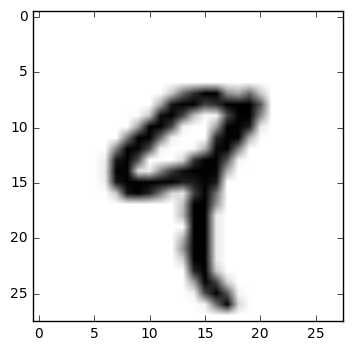

In [26]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in Numpy

Selecting specific elements in a tensor is called tensor slicing. (Like what we did above)

The following example selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):

In [27]:
my_slice = train_images[10:100]
print(my_slice.shape)

# 90 images and each are 28 x 28 matrices with the grayscale value as the scalar

(90, 28, 28)


In [28]:
#It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. Note that : is equivalent to selecting the
#entire axis:
    
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [29]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In general, you may select between any two indices along each tensor axis. For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you do this:

In [30]:
my_slice = train_images[:, 14:, 14:]

# Image #, X, Y

It’s also possible to use negative indices. Much like negative indices in Python lists,
they indicate a position relative to the end of the current axis. In order to crop the
images to patches of 14 × 14 pixels centered in the middle, you do this:

In [31]:
my_slice = train_images[:, 7:-7, 7:-7]
# All images, take 7 from top and bottom of x, take 7 from each side of the y - so get to the middle 

### The notion of data batches

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the samples axis (sometimes called the samples dimension). In the MNIST example, samples are images of digits (Think sample size of).

In addition, deep-learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128:

In [32]:
batch = train_images[:128]

In [33]:
batch = train_images[128:256]
#batch = train_images[128 * n:128 * (n + 1)]

When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension

#### Real-world examples of data tensors

The data you’ll manipulate will almost always fall into one of the following categories:
- Vector data—2D tensors of shape (samples, features)
- Timeseries data or sequence data—3D tensors of shape (samples, timesteps, features)
- Images—4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
- Video—5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a onedimensional color channel for grayscale images. 
- A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3) (see figure 2.4).
- There are two conventions for shapes of images tensors: the channels-last convention (used by TensorFlow) and the channels-first convention (used by Theano). The TensorFlow machine-learning framework, from Google, places the color-depth axis at the end: (samples, height, width, color_depth). Meanwhile, Theano places the color depth axis right after the batch axis: (samples, color_depth, height, width).

Video data is one of the few types of real-world data for which you’ll need 5D tensors. A video can be understood as a sequence of frames, each frame being a color image. (So just add time series to images - put 4D into an array)
- For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). 4 clips, 240 frames, 144 row and 256 height in pixels, 3 color channel - sample, frames, height, width, color_depth
    - If the dtype of the tensor was float32, then each value would be stored in 32 bits, so the tensor would represent 405 MB. (4*240*144*256*3 = 106,168,320; there are 8 bits in 1 byte, so 32 bits = 32/8 = 4 bytes; 4 bytes * 106,168,320 = 424 MB
    - Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).
    
#### The gears of neural networks: tensor operations

All transformations learned by deep neural networks can be reduced to a handful of tensor operations applied to tensors of numeric data.

In our initial example, we were building our network by stacking Dense layers on top of each other. A Keras layer instance looks like this:

In [34]:
#keras.layers.Dense(512, activation='relu')

This layer can be interpreted as a function, which takes as input a 2D tensor and
returns another 2D tensor—a new representation for the input tensor. 

Specifically, the function is as follows (where W is a 2D tensor and b is a vector, both attributes of the
layer):

In [35]:
#output = relu(dot(W, input) + b)

Let’s unpack this. We have three tensor operations here: a dot product (dot) between
the input tensor and a tensor named W; an addition (+) between the resulting 2D tensor and a vector b; and, finally, a relu operation. relu(x) is max(x, 0).

####  Element-wise operations

The relu operation and addition are element-wise operations: operations that are applied independently to each entry in the tensors being considered.

This means these operations are highly amenable to massively parallel implementations. 

If you want to write a naive Python implementation of an element-wise operation, you use a for loop, as in this naive implementation of an element-wise relu operation:

In [36]:
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

You do the same for addition:

In [37]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

BLAS are low-level, highly parallel, efficient tensor-manipulation routines that are typically implemented in Fortran or C

So, in Numpy, you can do the following element-wise operation, and it will be blazing fast:

In [38]:
import numpy as np

#z = x+y
#z = np.maximum(z, 0.)

### Broadcasing 
Our earlier naive implementation of naive_add only supports the addition of 2D tensors with identical shapes. But in the Dense layer introduced earlier, we added a 2D tensor with a vector. 

What happens with addition when the shapes of the two tensors being added differ?

When possible, and if there’s no ambiguity, the smaller tensor will be broadcasted to match the shape of the larger tensor. Broadcasting consists of two steps:
- 1 Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
- 2 The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

Let’s look at a concrete example. 

Consider X with shape (32, 10) and y with shape (10,). (So a matrix and a vector)

First, we add an empty first axis to y, whose shape becomes (1, 10). Then, we repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10), where Y[i, :] == y for i in range(0, 32). 

At this point, we can proceed to add X and Y, because they have the same shape.

In terms of implementation, no new 2D tensor is created, because that would be terribly inefficient. The repetition operation is entirely virtual: it happens at the algorithmic level rather than at the memory level. 

Here’s what a naive implementation would look like:

In [39]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

With broadcasting, you can generally apply two-tensor element-wise operations if one tensor has shape (a, b, … n, n + 1, … m) and the other has shape (n, n + 1, … m).

The broadcasting will then automatically happen for axes a through n - 1.

### Tensor dot
The dot operation, also called a tensor product (not to be confused with an elementwise product) is the most common, most useful tensor operation. 

Contrary to element-wise operations, it combines entries in the input tensors.

An element-wise product is done with the * operator in Numpy, Keras, Theano, and TensorFlow. dot uses a different syntax in TensorFlow, but in both Numpy and Keras it’s done using the standard dot operator:

In [40]:
#import numpy as np
#z = np.dot(x, y)

#In mathematical notation, you’d note the operation with a dot (.):
#z=x.y

Mathematically, what does the dot operation do? Let’s start with the dot product of two vectors x and y. It’s computed as follows:

In [41]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

You’ll have noticed that the dot product between two vectors is a scalar and that only vectors with the same number of elements are compatible for a dot product

You can also take the dot product between a matrix x and a vector y, which returns a vector where the coefficients are the dot products between y and the rows of x. You
implement it as follows:

In [42]:
import numpy as np

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # Matrix
    assert len(y.shape) == 1 # Vector
    assert x.shape[1] == y.shape[0] # Broadcasting
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

You could also reuse the code we wrote previously, which highlights the relationship between a matrix-vector product and a vector product:

In [43]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

Of course, a dot product generalizes to tensors with an arbitrary number of axes.

The most common applications may be the dot product between two matrices. You can take the dot product of two matrices x and y (dot(x, y)) if and only if x.shape[1] == y.shape[0]. 

### Tensor reshaping

A third type of tensor operation that’s essential to understand is tensor reshaping.
Although it wasn’t used in the Dense layers in our first neural network example, we
used it when we preprocessed the digits data before feeding it into our network:

train_images = train_images.reshape((60000, 28 * 28))

Reshaping a tensor means rearranging its rows and columns to match a target shape.
Naturally, the reshaped tensor has the same total number of coefficients as the initial
tensor. 

In [44]:
x = np.array([[0., 1.],
[2., 3.],
[4., 5.]])

print(x.shape)

# 3 rows, 2 columns

(3, 2)


In [45]:
x = x.reshape((6, 1))
x

# 6 rows, 1 column

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [46]:
x = x.reshape((2, 3))
x

# 2 rows, 3 columns

array([[0., 1., 2.],
       [3., 4., 5.]])

A special case of reshaping that’s commonly encountered is transposition. Transposing a
matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]:

In [47]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


In general, elementary geometric operations such as affine transformations, rotations, scaling, and so on can be expressed as tensor operations. 

For instance, a rotation of a 2D vector by an angle theta can be achieved via a dot product with a 2 × 2 matrix
R = [u, v], where u and v are both vectors of the plane: u = [cos(theta), sin(theta)] and v = [-sin(theta), cos(theta)]. 

You just learned that neural networks consist entirely of chains of tensor operations and
that all of these tensor operations are just geometric transformations of the input data.

In 3D, the following mental image may prove useful. Imagine two sheets of colored
paper: one red and one blue. Put one on top of the other. Now crumple them
together into a small ball. That crumpled paper ball is your input data, and each sheet
of paper is a class of data in a classification problem. What a neural network (or any
other machine-learning model) is meant to do is figure out a transformation of the
paper ball that would uncrumple it, so as to make the two classes cleanly separable
again. With deep learning, this would be implemented as a series of simple transformations of the 3D space, such as those you could apply on the paper ball with your fingers, one movement at a time.

Uncrumpling paper balls is what machine learning is about: finding neat representations for complex, highly folded data manifolds. At this point, you should have a
pretty good intuition as to why deep learning excels at this: it takes the approach of
incrementally decomposing a complicated geometric transformation into a long
chain of elementary ones, which is pretty much the strategy a human would follow to
uncrumple a paper ball. Each layer in a deep network applies a transformation that
disentangles the data a little—and a deep stack of layers makes tractable an extremely
complicated disentanglement process. 

### Gradient-based optimization

output = relu(dot(W, input) + b)

In this expression, W and b are tensors that are attributes of the layer. They’re called the weights or trainable parameters of the layer (the kernel and bias attributes, respectively). These weights contain the information learned by the network from exposure to training data.

Initially, these weight matrices are filled with small random values (a step called random initialization). What comes next is to gradually
adjust these weights, based on a feedback signal. 

This happens within what’s called a training loop, which works as follows. Repeat
these steps in a loop, as long as necessary:
1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
4. Update all weights of the network in a way that slightly reduces the loss on this batch.

Given an individual weight coefficient in the network, how can you compute whether the coefficient should be increased or decreased, and by how much?
-  One naive solution would be to freeze all weights in the network except the one scalar coefficient being considered, and try different values for this coefficient. 
- A much better approach is to take advantage of the fact that all operations used in the network are differentiable, and compute the gradient of the loss with regard to the network’s coefficients

For every differentiable function f(x) (differentiable means “can be derived”: for example, smooth, continuous functions can be derived), there exists a derivative function f'(x) that maps values of x to the slope of the local linear approximation of f in those points.

A gradient is the derivative of a tensor operation.

Consider an input vector x, a matrix W, a target y, and a loss function loss. 
- You can use W to compute a target candidate y_pred, and compute the loss, or mismatch,between the target candidate y_pred and the target y:

### 2.4.3 Stochastic gradient descent

Given a differentiable function, it’s theoretically possible to find its minimum analytically: it’s known that a function’s minimum is a point where the derivative is 0, so all you have to do is find all the points where the derivative goes to 0 and check for which
of these points the function has the lowest value.

Given a differentiable function, it’s theoretically possible to find its minimum analytically: it’s known that a function’s minimum is a point where the derivative is 0, so all you have to do is find all the points where the derivative goes to 0 and check for which of these points the function has the lowest value.

Applied to a neural network, that means finding analytically the combination of weight values that yields the smallest possible loss function.

You can use the four-step algorithm outlined at the beginning of this section: modify the parameters little by little based on the current loss value on a random batch of data

Mini-batch Stochastic Gradient Descent 
1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
4. Compute the gradient of the loss with regard to the network’s parameters (a backward pass).
5. Move the parameters a little in the opposite direction from the gradient—for example W -= step * gradient—thus reducing the loss on the batch a bit.

The term stochastic refers to the fact that each batch of data is drawn at random (stochastic is a scientific synonym of random).

As you can see, intuitively it’s important to pick a reasonable value for the step factor.

If it’s too small, the descent down the curve will take many iterations, and it could get
stuck in a local minimum. If step is too large, your updates may end up taking you to
completely random locations on the curve.

### 2.4.4 Chaining derivatives: the Backpropagation algorithm
In practice, a neural network function consists of many tensor operations chained together, each of which has a simple, known derivative. 

Calculus tells us that such a chain of functions can be derived using the following identity, called the chain rule:

Applying the chain rule to the computation of the gradient values of a neural network gives rise to an algorithm called Backpropagation (also sometimes called reverse-mode differentiation).

Backpropagation starts with the final loss value and works backward from the top layers to the bottom layers, applying the chain rule to compute the contribution that each parameter had in the loss value.

Nowadays, and for years to come, people will implement networks in modern frameworks that are capable of symbolic differentiation, such as TensorFlow. This means that, given a chain of operations with a known derivative, they can compute a gradient function for the chain (by applying the chain rule) that maps network parameter values to gradient values
- When you have access to such a function, the backward pass is reduced to a call to this gradient function. Thanks to symbolic differentiation, you’ll never have to implement the Backpropagation algorithm by hand.

### Review 

In [48]:
#  This was the input data:
# Listing 2.1 Loading the MNIST dataset in Keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Now you understand that the input images are stored in Numpy tensors, which are here formatted as float32 tensors of shape (60000, 784) 
# (training data) and (10000, 784) (test data), respectively

In [49]:
#  This was our network:

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [50]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Now you understand that this network consists of a chain of two Dense layers, that
# each layer applies a few simple tensor operations to the input data, and that these
# operations involve weight tensors. Weight tensors, which are attributes of the layers,
# are where the knowledge of the network persists.

In [51]:
#  This was the network-compilation step:

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#Now you understand that categorical_crossentropy is the loss function that’s used
#as a feedback signal for learning the weight tensors, and which the training phase will
#attempt to minimize. You also know that this reduction of the loss happens via minibatch stochastic gradient descent. 

In [52]:
#Finally, this was the training loop:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Now you understand what happens when you call fit: the network will start to iterate
# on the training data in mini-batches of 128 samples, 5 times over (each iteration over
# all the training data is called an epoch).

#  At each iteration, the network will compute the
# gradients of the weights with regard to the loss on the batch, and update the weights accordingly 

# After these 5 epochs, the network will have performed 2,345 gradient
# updates (469 per epoch), and the loss of the network will be sufficiently low that the
# network will be capable of classifying handwritten digits with high accuracy

Epoch 1/5


ValueError: in user code:

    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/keras/engine/training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/keras/losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/keras/backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


### Chapter Summary 

1. Learning means finding a combination of model parameters that minimizes a loss function for a given set of training data samples and their corresponding targets.

2. Learning happens by drawing random batches of data samples and their targets, and computing the gradient of the network parameters with respect to the loss on the batch. The network parameters are then moved a bit (the magnitude of the move is defined by the learning rate) in the opposite direction from the gradient.

3. The entire learning process is made possible by the fact that neural networks are chains of differentiable tensor operations, and thus it’s possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value.

4. Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a network.

5. The loss is the quantity you’ll attempt to minimize during training, so it should represent a measure of success for the task you’re trying to solve.

6. The optimizer specifies the exact way in which the gradient of the loss will be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.

# Chapter 3. Getting Started with Neural Networks

You’ll apply what you’ve learned to three new problems covering the three most common use cases of neural networks: binary classification, multiclass classification, and scalar regression.

In this chapter, we’ll take a closer look at the core components of neural networks that we introduced in chapter 2: layers, networks, objective functions, and optimizers.

We’ll give you a quick introduction to Keras, the Python deep-learning library that we’ll use throughout the book. You’ll set up a deep-learning workstation, with TensorFlow, Keras, and GPU support.

We’ll dive into three introductory examples of how to use neural networks to address real problems:
1. Classifying movie reviews as positive or negative (binary classification)
2. Classifying news wires by topic (multiclass classification)
3. Estimating the price of a house, given real-estate data (regression)

### Anatomy of a neural network 
1. Layers, which are combined into a network (or model)
2. The input data and corresponding targets
3. The loss function, which defines the feedback signal used for learning
4. The optimizer, which determines how learning proceeds

You can visualize their interaction as illustrated in figure 3.1: the network, composed
of layers that are chained together, maps the input data to predictions. The loss function then compares these predictions to the targets, producing a loss value: a measure of how well the network’s predictions match what was expected. The optimizer uses
this loss value to update the network’s weights.

<img src="Screen Shot 2020-10-01 at 10.35.56 AM.png">

### Layers: the building blocks of deep learning

The fundamental data structure in neural networks is the layer - A layer is a data-processing module that takes as input one or
more tensors and that outputs one or more tensors. 
- Some layers are stateless, but more frequently layers have a state: the layer’s weights, one or several tensors learned with stochastic gradient descent, which together contain the network’s knowledge.
-  Different layers are appropriate for different tensor formats and different types of data processing.
    - Simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers 
    -  Sequence data, stored in 3D tensors of shape (samples, timesteps, features), is typically processed by recurrent layers such as an LSTM layer. (Timesteps lends itself to LSTM obviously)
    - Image data, stored in 4D tensors, is usually processed by 2D convolution layers (Conv2D).

Building deep-learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines
- The notion of layer compatibility here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape. 

In [53]:
from keras import layers

layer = layers.Dense(32, input_shape=(784,))

We’re creating a layer that will only accept as input 2D tensors where the first dimension is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be accepted). This layer will return a tensor where the first dimension has been transformed to be 32.

Thus this layer can only be connected to a downstream layer that expects 32-dimensional vectors as its input. When using Keras, you don’t have to worry about compatibility, because the layers you add to your models are dynamically built to match the shape of the incoming layer. For instance, suppose you write the following:

In [54]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

The second layer didn’t receive an input shape argument—instead, it automatically inferred its input shape as being the output shape of the layer that came before. 

By choosing a network topology, you constrain your space of possibilities (hypothesis space) to a specific series of tensor operations, mapping input data to output data. What you’ll then be searching for is a good set of values for the weight tensors involved in these tensor operations.

###  Loss functions and optimizers: keys to configuring the learning process

Once the network architecture is defined, you still have to choose two more things:
- Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand.
- Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

A neural network that has multiple outputs may have multiple loss functions (one per output). But the gradient-descent process must be based on a single scalar loss value; so, for multiloss networks, all losses are combined (via averaging) into a single scalar quantity

Fortunately, when it comes to common problems such as classification, regression, and sequence prediction, there are simple guidelines you can follow to choose the correct loss. 
- For instance, you’ll use binary crossentropy for a two-class classification problem, 
- Categorical crossentropy for a many-class classification problem
- Meansquared error for a regression problem,
- Connectionist temporal classification (CTC) for a sequence-learning problem, and so on. 

### 3.2 Introduction to Keras
Keras is a deep-learning framework for Python that provides a convenient way to define and train almost any kind of deep-learning model.

Keras has the following key features:
- It allows the same code to run seamlessly on CPU or GPU.
- It has a user-friendly API that makes it easy to quickly prototype deep-learning models.
- It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
- It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. This means Keras is appropriate for building essentially any deep-learning model, from a generative adversarial network to a neural Turing machine.

Keras is also a popular framework on Kaggle, the machine-learning competition website, where almost every recent deep-learning competition has been won using Keras models.

#### 3.2.1 Keras, TensorFlow, Theano, and CNTK
Keras is a model-level library, providing high-level building blocks for developing deep-learning models. 
- It doesn’t handle low-level operations such as tensor manipulation and differentiation. Instead, it relies on a specialized, well-optimized tensor library to do so, serving as the backend engine of Keras. 
- Currently, the three existing backend implementations are the TensorFlow backend, the Theano backend, and the Microsoft Cognitive  Toolkit (CNTK) backend.

<img src="Screen Shot 2020-10-02 at 7.30.39 AM.png">

### TensorFlow, CNTK, and Theano are some of the primary platforms for deep learning today. 
- Theano (http://deeplearning.net/software/theano) is developed by the MILA
lab at Université de Montréal, 
- TensorFlow (www.tensorflow.org) is developed by Google, and 
- CNTK (https://github.com/Microsoft/CNTK) is developed by Microsoft

We recommend using the TensorFlow backend as the default for most of your deep-learning needs, because it’s the most widely adopted, scalable, and production ready

When running on CPU, TensorFlow is itself wrapping a low-level library for tensor operations called Eigen (http://eigen.tuxfamily.org). 
- On GPU, TensorFlow wraps a library of well-optimized deep-learning operations called the NVIDIA CUDA Deep Neural Network library (cuDNN).

### 3.2.2 Developing with Keras: a quick overview
1. Define your training data: input tensors and target tensors.
2. Define a network of layers (or model ) that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
4. Iterate on your training data by calling the fit() method of your model.

There are two ways to define a model: using the Sequential class (only for linear stacks of layers, which is the most common network architecture by far) or the functional API (for directed acyclic graphs of layers, which lets you build completely arbitrary architectures).

As a refresher, here’s a two-layer model defined using the Sequential class (note that we’re passing the expected shape of the input data to the first layer):

In [55]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

And here’s the same model defined using the functional API:

In [56]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

With the functional API, you’re manipulating the data tensors that the model processes and applying layers to this tensor as if they were functions.

The learning process is configured in the compilation step, where you specify the
optimizer and loss function(s) that the model should use, as well as the metrics you
want to monitor during training. Here’s an example with a single loss function, which
is by far the most common case:

In [57]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

Finally, the learning process consists of passing Numpy arrays of input data (and the
corresponding target data) to the model via the fit() method, similar to what you
would do in Scikit-Learn and several other machine-learning libraries:

In [58]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

### 3.3 Setting up a deep-learning workstation

Some applications—in particular, image processing with convolutional networks and sequence processing with recurrent neural networks—will be excruciatingly slow on CPU, even a fast multicore CPU.

And even for applications that can realistically be run on CPU, you’ll generally see speed increase by a factor or 5 or 10 by using a modern GPU.

If you don’t want to install a GPU on your machine, you can alternatively consider running your experiments on an AWS EC2 GPU instance.

Whether you’re running locally or in the cloud, it’s better to be using a Unix workstation. Although it’s technically possible to use Keras on Windows (all three Keras backends support Windows), We don’t recommend it. 
- In the installation instructions in appendix A, we’ll consider an Ubuntu machine. If you’re a Windows user, the simplest solution to get everything running is to set up an Ubuntu dual boot on your machine. It may seem like a hassle, but using Ubuntu will save you a lot of time and trouble in the long run.

Note that in order to use Keras, you need to install TensorFlow or CNTK or Theano (or all of them, if you want to be able to switch back and forth among the three backends). In this book, we’ll focus on TensorFlow, with some light instructions relative to Theano. We won’t cover CNTK.

#### 3.3.2 Getting Keras running: two options

Use the official EC2 Deep Learning AMI (https://aws.amazon.com/amazonai/amis), and run Keras experiments as Jupyter notebooks on EC2. Do this if you don’t already have a GPU on your local machine. Appendix B provides a step-by-step guide

## Appendix B: Running Jupyter notebooks on an EC2 GPU instance

Running Jupyter notebooks on AWS gives you the same experience as running on your local machine, while allowing you to use one or several GPUs on AWS.

AWS GPU instances can quickly become expensive. The one we suggest using costs $0.90 per hour.

This is fine for occasional use; but if you’re going to run experiments for several hours per day every day, then you’re better off building your own deeplearning machine with a TITAN X or GTX 1080 Ti.

1. Select AWS Marketplace (see figure B.2), and search for “deep learning” in the search box. Scroll down until you find the AMI named Deep Learning AMI Ubuntu Version (see figure B.3);
2. Select the p2.xlarge instance (see figure B.4). This instance type provides access to a single GPU and costs $0.90 per hour of usage (as of March 2017).

AWS Deep Learning AMI are built and optimized for building, training, debugging, and serving deep learning models in EC2 with popular frameworks such as TensorFlow, MXNet, PyTorch, Chainer, Keras, and more. Deep learning frameworks are installed in Conda environments to provide a reliable and isolated environment for practitioners. The AWS Deep Learning AMI is provided at no additional charge to Amazon EC2 users. Deep Learning frameworks are pre-configured with latest versions of NVIDIA CUDA, cuDNN and Intel acceleration libraries such as MKL-DNN and iDeep for high performance across Amazon EC2 instances such as P3 and C5. The AMI also includes Docker and Nvidia-Docker.

### 3.3.3 Running deep-learning jobs in the cloud: pros and cons

Meanwhile, a solid consumerclass GPU will cost you somewhere between $1,000 and $1,500—a price that has been fairly stable over time, even as the specs of these GPUs keep improving. If you’re serious about deep learning, you should set up a local workstation with one or more GPUs.

If you’re going to buy a GPU, which one should you choose? The first thing to note is that it must be an NVIDIA GPU. NVIDIA is the only graphics computing company that has invested heavily in deep learning so far, and modern deep-learning frameworks can only run on NVIDIA cards.`

### To add to GPU once I have it up running

#### 3.4 Classifying movie reviews: a binary classification example

In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.


In [59]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [60]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [61]:
train_labels[0]

1

Because you’re restricting yourself to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [62]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here’s how you can quickly decode one of these reviews back to English
words:

In [63]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#### 3.4.2 Preparing the data

You can’t feed lists of integers into a neural network. You have to turn your lists into tensors. There are two ways to do that:
1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book).

2. One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

Let’s go with the latter solution to vectorize the data, which you’ll do manually for maximum clarity.

The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns (see figure 5.1): in the case of images, patterns found in small 2D windows of the inputs. In the previous example, these windows were all 3 × 3.

<img src="Screen Shot 2020-10-05 at 1.16.21 PM.png">

This key characteristic gives convnets two interesting properties:
1. The patterns they learn are translation invariant. After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. 
    - A densely connected network would have to learn the pattern anew if it appeared at a new location. 
    - This makes convnets data efficient when processing images (because the visual world is fundamentally translation invariant): they need fewer training samples to learn representations that have generalization power.
2. They can learn spatial hierarchies of patterns (see figure 5.2). 
    - A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. 
    - This allows convnets to efficiently learn increasingly complex and abstract visual concepts (because the visual world is fundamentally spatially hierarchical).
    
<img src="Screen Shot 2020-10-05 at 1.18.26 PM 1.png">

Convolutions operate over 3D tensors, called feature maps, with two spatial axes (height and width) as well as a depth axis (also called the channels axis).
- For an RGB image, the dimension of the depth axis is 3, because the image has three color channels: red, green, and blue. 
- For a black-and-white picture, like the MNIST digits, the depth is 1 (levels of gray). 
- The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an output feature map. 
-  Filters encode specific aspects of the input data: at a high level, a single filter could encode the concept “presence of a face in the input,” for instance.

In the MNIST example, the first convolution layer takes a feature map of size (28, 28, 1) and outputs a feature map of size (26, 26, 32): it computes 32 filters over its input. 
- Each of these 32 output channels contains a 26 × 26 grid of values, which is a response map of the filter over the input, indicating the response of that filter pattern at different locations in the input (see figure 5.3). That is what the term feature map means: every dimension in the depth axis is a feature (or filter), and the 2D tensor output[:, :, n] is the 2D spatial map of the response of this filter over the input.

Convolutions are defined by two key parameters:
1. Size of the patches extracted from the inputs—These are typically 3 × 3 or 5 × 5. In the example, they were 3 × 3, which is a common choice. (So we're cutting the image apart to some degree)
2. Depth of the output feature map—The number of filters computed by the convolution. The example started with a depth of 32 and ended with a depth of 64.

In Keras Conv2D layers, these parameters are the first arguments passed to the layer: Conv2D(output_depth, (window_height, window_width)).
-  A convolution works by sliding these windows of size 3 × 3 or 5 × 5 over the 3D input feature map, stopping at every possible location, and extracting the 3D patch of surrounding features (shape (window_height, window_width, input_depth)).
- Each such 3D patch is then transformed (via a tensor product with the same learned weight matrix, called the convolution kernel) into a 1D vector of shape (output_depth,)
- All of these vectors are then spatially reassembled into a 3D output map of shape (height, width, output_depth). 
    - Every spatial location in the output feature map corresponds to the same location in the input feature map (for example, the lower-right corner of the output contains information about the lower-right corner of the input). 
        - For instance, with 3 × 3 windows, the vector output[i, j, :] comes from the 3D patch input[i-1:i+1, j-1:j+1, :]. 

<img src="Screen Shot 2020-10-05 at 1.27.45 PM.png">

Note that the output width and height may differ from the input width and height.
They may differ for two reasons:
1. Border effects, which can be countered by padding the input feature map
2. The use of strides, which I’ll define in a second

#### UNDERSTANDING BORDER EFFECTS AND PADDING
Consider a 5 × 5 feature map (25 tiles total). There are only 9 tiles around which you can center a 3 × 3 window, forming a 3 × 3 grid.
- Hence, the output feature map will be 3 × 3.
-  It shrinks a little: by exactly two tiles alongside each dimension, in this case
- If you want to get an output feature map with the same spatial dimensions as the input, you can use padding. 
    - Padding consists of adding an appropriate number of rows and columns on each side of the input feature map so as to make it possible to fit center convolution windows around every input tile. 
    -  For a 3 × 3 window, you add one column on the right, one column on the left, one row at the top, and one row at the bottom. For a 5 × 5 window, you add two rows (see figure 5.6).
    - Padding a 5 × 5 input in order to be able to extract 25 3 × 3 patches
    - In Conv2D layers, padding is configurable via the padding argument, which takes two values: "valid", which means no padding (only valid window locations will be used); and "same", which means “pad in such a way as to have an output with the same width and height as the input.” The padding argument defaults to "valid". 
    
#### UNDERSTANDING CONVOLUTION STRIDES
The description of convolution so far has assumed that the center tiles of the convolution windows are
all contiguous. But the distance between two successive windows is a parameter of the convolution, called its stride, which defaults to 1. It’s possible to have strided convolutions: convolutions with a stride higher than 1.
- Using stride 2 means the width and height of the feature map are downsampled by a factor of 2 (in addition to any changes induced by border effects).
- Strided convolutions are rarely used in practice, although they can come in handy for some types of models; it’s good to be familiar with the concept.
- To downsample feature maps, instead of strides, we tend to use the max-pooling operation, which you saw in action in the first convnet example. 

#### 5.1.2 The max-pooling operation
In the convnet example, you may have noticed that the size of the feature maps is halved after every MaxPooling2D layer. 
- For instance, before the first MaxPooling2D layers, the feature map is 26 × 26, but the max-pooling operation halves it to 13 × 13.
- That’s the role of max pooling: to aggressively downsample feature maps, much like strided convolutions
- Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel. 
    - It’s conceptually similar to convolution, except that instead of transforming local patches via a learned linear transformation (the convolution kernel), they’re transformed via a hardcoded max tensor operation. 
    - A big difference from convolution is that max pooling is usually done with 2 × 2 windows and stride 2, in order to downsample the feature maps by a factor of 2.  On the other hand, convolution is typically done with 3 × 3 windows and no stride (stride 1).
    
 Why downsample feature maps this way? Why not remove the max-pooling layers
and keep fairly large feature maps all the way up? Let’s look at this option. The convolutional base of the model would then look like this:

model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))

What’s wrong with this setup? Two things:
1. It isn’t conducive to learning a spatial hierarchy of features. The 3 × 3 windows in the third layer will only contain information coming from 7 × 7 windows in the initial input. The high-level patterns learned by the convnet will still be very small with regard to the initial input, which may not be enough to learn to classify digits (try recognizing a digit by only looking at it through windows that are 7 × 7 pixels!). We need the features from the last convolution layer to contain information about the totality of the input.
2. The final feature map has 22 × 22 × 64 = 30,976 total coefficients per sample. This is huge. If you were to flatten it to stick a Dense layer of size 512 on top, that layer would have 15.8 million parameters. This is far too large for such a small model and would result in intense overfitting.

In short, the reason to use downsampling is to reduce the number of feature-map
coefficients to process, as well as to induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows (in terms of the fraction of
the original input they cover).

And you can use average pooling instead of max pooling, where each local input patch is transformed by taking the average value of each channel over the patch, rather than the max. But max pooling tends to work better than these alternative solutions. 
- In a nutshell, the reason is that features tend to encode the spatial presence of some pattern or concept over the different tiles of the feature map (hence, the term feature map), and it’s more informative to look at the maximal presence of different features than at their average presence. 
-  So the most reasonable subsampling strategy is to first produce dense maps of features (via unstrided convolutions) and then look at the maximal activation of the features over small patches, rather than looking at sparser windows of the inputs (via strided convolutions) or averaging input patches, which could cause you to miss or dilute feature-presence information.

#### 5.2 Training a convnet from scratch on a small dataset
A “few” samples can mean anywhere from a few hundred to a few tens of thousands of images.
- As a practical example, we’ll focus on classifying images as dogs or cats, in a dataset containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training—1,000 for validation, and 1,000 for testing.
    
You’ll start by naively training a small convnet on the 2,000 training samples, without any regularization, to set a baseline for what can be achieved. (71)
- Then we’ll introduce data augmentation, a powerful technique for mitigating overfitting in computer vision. (82)
- In the next section, we’ll review two more essential techniques for applying deep learning to small datasets: feature extraction with a pretrained network (which will get you to an accuracy of 90% to 96%) and fine-tuning a pretrained network (this will get you to a final accuracy of 97%). 

Together, these three strategies—training a small model from scratch, doing feature extraction using a pretrained model, and fine-tuning a pretrained model—will constitute your future toolbox for tackling the problem of performing image classification with small datasets.

This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, you’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

#### Importing Data First Time

In [2]:
import os, shutil

# Path to the directory where the original train dataset was uncompressed
original_dataset_dir = 'dogs-vs-cats/train'

# Directory where you’ll store your smaller dataset
base_dir = 'dogs-vs-cats-small'

os.mkdir(base_dir)

# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with test cat pictures 
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

FileExistsError: [Errno 17] File exists: 'dogs-vs-cats-small/train'

#### Returning to Data 

In [1]:
import os, shutil

# Path to the directory where the original train dataset was uncompressed
original_dataset_dir = 'dogs-vs-cats/train'

# Directory where you’ll store your smaller dataset
base_dir = 'dogs-vs-cats-small'

# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with test cat pictures 
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

As a sanity check, let’s count how many pictures are in each training split (train/validation/test):

In [2]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [3]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [4]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [5]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [6]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [7]:
 print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


So you do indeed have 2,000 training images, 1,000 validation images, and 1,000 test
images. Each split contains the same number of samples from each class: this is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success. 

You built a small convnet for MNIST in the previous example, so you should be familiar with such convnets. 
- You’ll reuse the same general structure: the convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.
    - But because you’re dealing with bigger images and a more complex problem, you’ll make your network larger, accordingly: it will have one more Conv2D + MaxPooling2D stage. 
    - This serves both to augment the capacity of the network and to further reduce the size of the feature maps so they aren’t overly large when you reach the Flatten layer. 
    - Here, because you start from inputs of size 150 × 150 (a somewhat arbitrary choice), you end up with feature maps of size 7 × 7 just before the Flatten layer.
    - The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from 148 × 148 to 7 × 7). This is a pattern you’ll see in almost all convnets.

In [8]:
# Listing 5.5 Instantiating a small convnet for dogs vs. cats classification

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

For the compilation step, you’ll go with the RMSprop optimizer, as usual. Because you
ended the network with a single sigmoid unit, you’ll use binary crossentropy as the
loss 

In [10]:
# Listing 5.6 Configuring the model for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### 5.2.4 Data preprocessing
As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. 

Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

Keras has a module with image-processing helper tools, located at
keras.preprocessing.image. In particular, it contains the class ImageDataGenerator,
which lets you quickly set up Python generators that can automatically turn image files
on disk into batches of preprocessed tensors. 

In [11]:
# Listing 5.7 Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Resizes all images to 150 × 150
# Because you use binary_crossentropy loss, you need binary labels.
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s look at the output of one of these generators: it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). 

There are 20 samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point:

In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let’s fit the model to the data using the generator. 

You do so using the fit_generator method, the equivalent of fit for data generators like this one. 
- It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. 
- Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. 
    - This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch.

In [13]:
# Listing 5.8 Fitting the model using a batch generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/30


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Relu (defined at <ipython-input-13-b9196c124cd6>:7) ]] [Op:__inference_train_function_1204]

Function call stack:
train_function


In [16]:
# Listing 5.9 Saving the model
#model.save('cats_and_dogs_small_1.h5')

# Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

These plots are characteristic of overfitting. The training accuracy increases linearly
over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.

The validation loss reaches its minimum after only five epochs and then stalls, whereas
the training loss keeps decreasing linearly until it reaches nearly 0

Because you have relatively few training samples (2,000), overfitting will be your
number-one concern.

We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation. 

#### Using data augmentation
Data augmentation takes the approach of generating more training data
from existing training samples, by augmenting the samples via a number of random
transformations that yield believable-looking images. 

 In Keras, this can be done by configuring a number of random transformations to
be performed on the images read by the ImageDataGenerator instance.

In [26]:
# Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

- rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.
- horizontal_flip is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

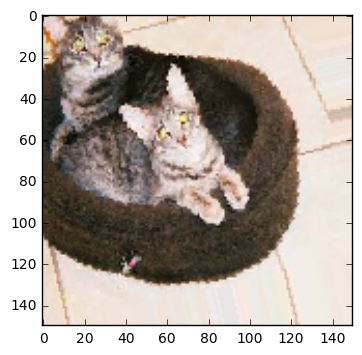

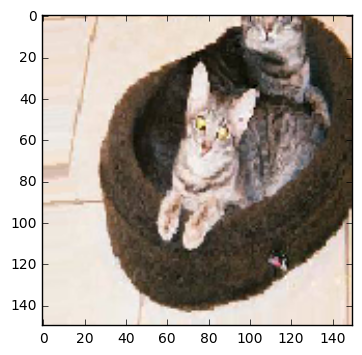

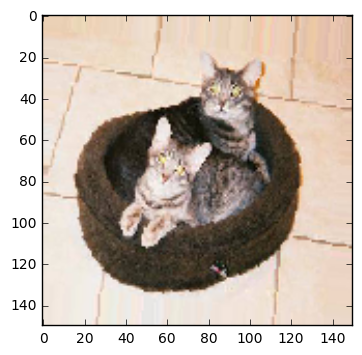

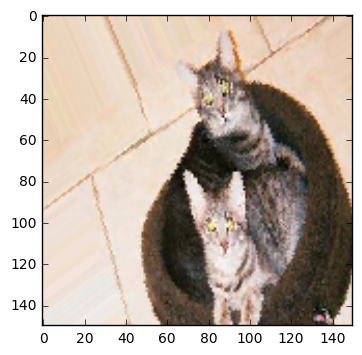

In [27]:
# Listing 5.12 Displaying some randomly augmented training images
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

 To further fight overfitting, you’ll also
add a Dropout layer to your model, right before the densely connected classifier.

In [29]:
# Listing 5.13 Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Listing 5.14 Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

# Everything is moving slow: Making me think the GPU might not be set up right? 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s - loss: 0.6914 - acc: 0.5200 - val_loss: 0.6803 - val_acc: 0.5565
Epoch 2/100
100/100 [==============================] - 24s - loss: 0.6775 - acc: 0.5700 - val_loss: 0.6499 - val_acc: 0.5986
Epoch 3/100
100/100 [==============================] - 24s - loss: 0.6681 - acc: 0.5769 - val_loss: 0.6543 - val_acc: 0.6022
Epoch 4/100
100/100 [==============================] - 24s - loss: 0.6447 - acc: 0.6184 - val_loss: 0.6156 - val_acc: 0.6566
Epoch 5/100
100/100 [==============================] - 24s - loss: 0.6276 - acc: 0.6259 - val_loss: 0.6080 - val_acc: 0.6491
Epoch 6/100
100/100 [==============================] - 24s - loss: 0.6080 - acc: 0.6688 - val_loss: 0.5743 - val_acc: 0.7120
Epoch 7/100
100/100 [==============================] - 24s - loss: 0.5938 - acc: 0.6788 - val_loss: 0.5722 - val_acc: 0.6965
Epoch 8/100
100/100 [====================

In [30]:
model.save('cats_and_dogs_small_2.h5')

Thanks to data augmentation and dropout, you’re no longer overfitting: the training curves are closely tracking
the validation curves. You now reach an accuracy of 82%, a 15% relative improvement
over the non-regularized model. (We'd be able to see if we plotted again)

By using regularization techniques even further, and by tuning the network’s parameters (such as the number of filters per convolution layer, or the number of layers in the network), you may be able to get an even better accuracy, likely up to 86% or 87%. 

But it would prove difficult to go any higher just by training your own convnet from scratch, because you have so little data to work with. As a next step to improve your accuracy on this problem, you’ll have to use a pretrained model, which is the focus of the next two sections. 

### 5.3 Using a pretrained convnet
For instance, you might train a network on ImageNet (where classes are mostly animals and everyday objects) and then repurpose this trained network for something as remote as identifying furniture items in images. 
- ImageNet contains many animal classes, including different species of cats and dogs, and you can thus expect to perform well on the dogs-versus-cats classification problem.
-  You’ll use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014; it’s a simple and widely used convnet architecture for ImageNet

#### Feature Extraction 
Feature extraction consists of using the representations learned by a previous network
to extract interesting features from new samples. 
- These features are then run through a new classifier, which is trained from scratch.

As you saw previously, convnets used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely connected classifier.

<img src="Screen Shot 2020-10-06 at 5.45.26 PM.png">

Why only reuse the convolutional base? Could you reuse the densely connected classifier as well? 
- In general, doing so should be avoided. The reason is that the representations learned by the convolutional base are likely to be more generic and therefore more reusable: the feature maps of a convnet are presence maps of generic concepts over a picture, which is likely to be useful regardless of the computer-vision problem at hand. 
- But the representations learned by the classifier will necessarily be specific to the set of classes on which the model was trained—they will only contain information about the presence probability of this or that class in the entire picture. 
- Additionally, representations found in densely connected layers no longer contain any information about where objects are located in the input image: these layers get rid of the notion of space, whereas the object location is still described by convolutional feature maps. For problems where object location matters, densely connected features are largely useless.

If your new dataset differs a lot from the dataset on which the original model was trained, you may be better off using only the first few layers of the model to do feature extraction, rather than using the entire convolutional base.
- In this case, because the ImageNet class set contains multiple dog and cat classes, it’s likely to be beneficial to reuse the information contained in the densely connected layers of the original model. But we’ll choose not to, in order to cover the more general case where the class set of the new problem doesn’t overlap the class set of the original model. 

Let’s put this in practice by using the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from cat and dog images, and then train a dogs-versus-cats classifier on top of these features.

Here’s the list of image-classification
models (all pretrained on the ImageNet dataset) that are available as part of keras
.applications:
- Xception
- Inception V3
- ResNet50
- VGG16
- VGG19
- MobileNet

Let’s instantiate the VGG16 model.

In [31]:
# Listing 5.16 Instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

56705024/58889256 [===========================>..] - ETA: 0s

You pass three arguments to the constructor:
- weights specifies the weight checkpoint from which to initialize the model.
- include_top refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet. Because you intend to use your own densely connected classifier (with only two classes: cat and dog), you don’t need to include it. (Seems to usually be this)
- input_shape is the shape of the image tensors that you’ll feed to the network. This argument is purely optional: if you don’t pass it, the network will be able to process inputs of any size.

In [32]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

The final feature map has shape (4, 4, 512). That’s the feature on top of which you’ll
stick a densely connected classifier.

At this point, there are two ways you could proceed:
1. Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier similar to those you saw in part 1 of this book. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, this technique won’t allow you to use data augmentation.

2. Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to use data augmentation, because every input image goes through the convolutional base every time it’s seen by the model. But for the same reason, this technique is far more expensive than the first.

#### Let’s walk through the code required to set up the first one: recording the output of conv_base on your data and using these outputs as inputs to a new model.

You’ll start by running instances of the previously introduced ImageDataGenerator to extract images as Numpy arrays as well as their labels. 

#### Listing 5.17 Extracting features using the pretrained convolutional base



In [35]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'dogs-vs-cats-small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
        return features, labels
    
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). You’ll feed them
to a densely connected classifier, so first you must flatten them to (samples, 8192):

In [36]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

At this point, you can define your densely connected classifier (note the use of dropout for regularization) and train it on the data and labels that you just recorded.

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s - loss: 0.6934 - acc: 0.9830 - val_loss: 0.6878 - val_acc: 0.9920
Epoch 2/30
2000/2000 [==============================] - 0s - loss: 0.6843 - acc: 0.9955 - val_loss: 0.6813 - val_acc: 0.9900
Epoch 3/30
2000/2000 [==============================] - 0s - loss: 0.6762 - acc: 0.9955 - val_loss: 0.6735 - val_acc: 0.9900
Epoch 4/30
2000/2000 [==============================] - 0s - loss: 0.6688 - acc: 0.9940 - val_loss: 0.6652 - val_acc: 0.9900
Epoch 5/30
2000/2000 [==============================] - 0s - loss: 0.6580 - acc: 0.9970 - val_loss: 0.6569 - val_acc: 0.9910
Epoch 6/30
2000/2000 [==============================] - 0s - loss: 0.6510 - acc: 0.9965 - val_loss: 0.6482 - val_acc: 0.9900
Epoch 7/30
2000/2000 [==============================] - 0s - loss: 0.6395 - acc: 0.9985 - val_loss: 0.6409 - val_acc: 0.9900
Epoch 8/30
2000/2000 [==============================] - 0s - loss: 0.6312 - a

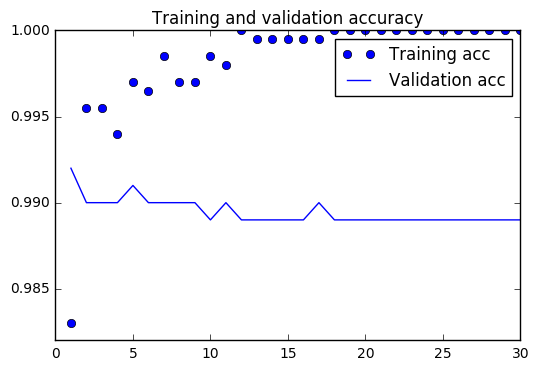

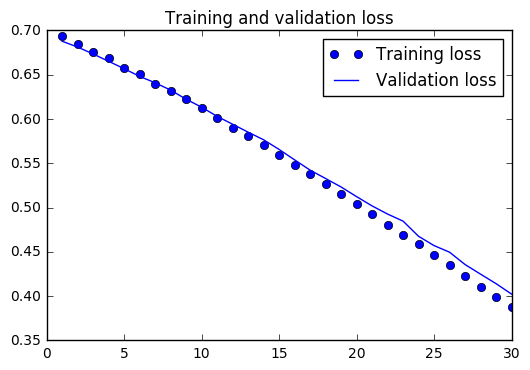

In [37]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

#Training is very fast, because you only have to deal with two Dense layers—an epoch takes less than one second even on CPU.

# Plot results 
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

You reach a validation accuracy of about 90%—much better than you achieved in the
previous section with the small model trained from scratch. 

But the plots also indicate
that you’re overfitting almost from the start—despite using dropout with a fairly large
rate. That’s because this technique doesn’t use data augmentation, which is essential
for preventing overfitting with small image datasets. 

#### Feature extraction with data augmentation 
Extending the conv_base model and running it end to end on the inputs.



In [59]:
# Listing 5.20 Adding a densely connected classifier on top of the convolutional base
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


As you can see, the convolutional base of VGG16 has 14,714,688 parameters, which is very large. 

The classifier you’re adding on top has 2 million parameters.

Before you compile and train the model, it’s very important to freeze the convolutional base. 
- Freezing a layer or set of layers means preventing their weights from being updated during training. 
- If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. 
- Because the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned

In [61]:
#  In Keras, you freeze a network by setting its trainable attribute to False:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


With this setup, only the weights from the two Dense layers that you added will be
trained. That’s a total of four weight tensors: two per layer (the main weight matrix
and the bias vector). 

In [62]:
# Listing 5.21 Training the model end to end with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 76s - loss: 0.5022 - acc: 0.7355 - val_loss: 0.2263 - val_acc: 0.9130
Epoch 2/30
100/100 [==============================] - 74s - loss: 0.2825 - acc: 0.8805 - val_loss: 0.2208 - val_acc: 0.9160
Epoch 3/30
100/100 [==============================] - 74s - loss: 0.2217 - acc: 0.9065 - val_loss: 0.1706 - val_acc: 0.9230
Epoch 4/30
 99/100 [============================>.] - ETA: 0s - loss: 0.1955 - acc: 0.9141

KeyboardInterrupt: 

As you can see, you reach a validation accuracy of about 96%. This is much better than you achieved with the small
convnet trained from scratch.

#### 5.3.2 Fine-tuning
Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers.
- This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the problem at hand

<img src="Screen Shot 2020-10-06 at 6.33.20 PM.png">

It’s only possible to fine-tune the top layers of the convolutional base once the classifier on top has already been trained. If the classifier isn’t already trained, then the error signal propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed. 

Thus the steps for fine-tuning a network are as follow:
1. Add your custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.


In [63]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

You’ll fine-tune the last three convolutional layers, which means all layers up to block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and block5_conv3 should be trainable.

Why not fine-tune more layers? Why not fine-tune the entire convolutional base? You could. But you need to consider the following:
1. Earlier layers in the convolutional base encode more-generic, reusable features, whereas layers higher up encode more-specialized features. 
    - It’s more useful to fine-tune the more specialized features, because these are the ones that need to be repurposed on your new problem. There would be fast-decreasing returns in fine-tuning lower layers.
2. The more parameters you’re training, the more you’re at risk of overfitting.
    - The convolutional base has 15 million parameters, so it would be risky to attempt to train it on your small dataset.

In [17]:
# Listing 5.22 Freezing all layers up to a specific one
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
if set_trainable:
    layer.trainable = True
else:
    layer.trainable = False

NameError: name 'conv_base' is not defined

Now you can begin fine-tuning the network. You’ll do this with the RMSProp optimizer, using a very low learning rate.

The reason for using a low learning rate is that you want to limit the magnitude of the modifications you make to the representations of the three layers you’re fine-tuning. Updates that are too large may harm these representations.

In [18]:
# Listing 5.23 Fine-tuning the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_2/conv2d_4/Relu (defined at <ipython-input-18-37e50db92773>:11) ]] [Op:__inference_train_function_3550]

Function call stack:
train_function


Let’s plot the results using the same plotting code as before (see figures 5.20 and 5.21).

These curves look noisy. To make them more readable, you can smooth them by
replacing every loss and accuracy with exponential moving averages of these quantities. Here’s a trivial utility function to do this (see figures 5.22 and 5.23).

In [ ]:
# Listing 5.24 Smoothing the plots
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The validation accuracy curve look much cleaner. You’re seeing a nice 1% absolute improvement in accuracy, from about 96% to above 97%

You can now finally evaluate this model on the test data:

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Here you get a test accuracy of 97%. In the original Kaggle competition around this
dataset, this would have been one of the top results.

### Here’s what you should take away from the exercises in the past two sections:
1. Convnets are the best type of machine-learning models for computer-vision tasks. It’s possible to train one from scratch even on a very small dataset, with decent results.
2. On a small dataset, overfitting will be the main issue. Data augmentation is a powerful way to fight overfitting when you’re working with image data.
3. It’s easy to reuse an existing convnet on a new dataset via feature extraction. This is a valuable technique for working with small image datasets.
4. As a complement to feature extraction, you can use fine-tuning, which adapts to a new problem some of the representations previously learned by an existing model. This pushes performance a bit further.

#### 5.4 Visualizing what convnets learn
The representations learned by convnets are highly amenable to visualization, in large part because they’re representations of visual concepts. Three top ways to visualize: 
1. Visualizing intermediate convnet outputs (intermediate activations)—Useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.
2. Visualizing convnets filters—Useful for understanding precisely what visual pattern or concept each filter in a convnet is receptive to.
3. Visualizing heatmaps of class activation in an image—Useful for understanding which parts of an image were identified as belonging to a given class, thus allowing you to localize objects in images.


##### 1. 5.4.1 Visualizing intermediate activations

Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input (the output of a layer is often called its activation, the output of the activation function). 
- Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image.

Let’s start by loading the model that
you saved in section 5.2:

In [8]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       1

Next, you’ll get an input image—a picture of a cat, not part of the images the network
was trained on.

In [9]:
# Listing 5.25 Preprocessing a single image
img_path = 'dogs-vs-cats-small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


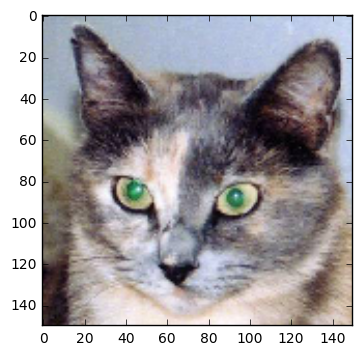

In [10]:
# Listing 5.26 Displaying the test picture
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In order to extract the feature maps you want to look at, you’ll create a Keras model
that takes batches of images as input, and outputs the activations of all convolution and
pooling layers.

A model is instantiated using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors).
- What sets the Model class apart is that it allows for models with multiple outputs, unlike Sequential. 

In [17]:
# Listing 5.27 Instantiating a model from an input tensor and a list of output tensors
from keras import models

# Extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

When fed an image input, this model returns the values of the layer activations in the original model. 
- This is the first time you’ve encountered a multi-output model in this book: until now, the models you’ve seen have had exactly one input and one output.
- This one has one input and eight outputs: one output per layer activation.

In [18]:
# Listing 5.28 Running the model in predict mode
activations = activation_model.predict(img_tensor)

# Returns a list of five Numpy arrays: one array per layer activation

# For instance, this is the activation of the first convolution layer for the cat image input:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node functional_5/conv2d_9/Conv2D (defined at <ipython-input-18-d5359ba00203>:2) ]] [Op:__inference_predict_function_715]

Function call stack:
predict_function


It’s a 148 × 148 feature map with 32 channels. Let’s try plotting the fourth channel of
the activation of the first layer of the original model (see figure 5.25).

For instance, this is the activation of the first convolution layer for the cat image input:


In [14]:
# Listing 5.29 Visualizing the fourth channel (of first layer)
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# This channel appears to encode a diagonal edge detector. 

Physical devices cannot be modified after being initialized


In [ ]:
# Listing 5.30 Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

# This one looks like a “bright green dot” detector, useful to encode cat eyes. 

At this
point, let’s plot a complete visualization of all the activations in the network (see figure 5.27).

You’ll extract and plot every channel in each of the eight activation maps,
and you’ll stack the results in one big image tensor, with channels stacked side by side.

In [ ]:
# Listing 5.31 Visualizing every channel in every intermediate activation
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,
                                         :, :,
                                         col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size,
                     row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Figure 5.27 Every channel of every layer activation on the test cat picture

We have just evidenced an important universal characteristic of the representations
learned by deep neural networks: the features extracted by a layer become increasingly abstract with the depth of the layer. 
- Edge detectors -> Cat ears and cat eyes -> deeper and deeper 
- The activations of higher layers carry less and less information about the specific input being seen, and more and more information about the target (in this case, the class of the image: cat or dog). 
- A deep neural network effectively acts as an information distillation pipeline, with raw data going in (in this case, RGB pictures) and being repeatedly transformed so that irrelevant information is filtered out (for example, the specific visual appearance of the image), and useful information is magnified and refined (for example, the class of the image).

#### 5.4.2 Visualizing convnet filters
- Another easy way to inspect the filters learned by convnets is to display the visual pattern that each filter is meant to respond to.
- This can be done with gradient ascent in input space: applying gradient descent to the value of the input image of a convnet so as to maximize the response of a specific filter, starting from a blank input image. 
- The process is simple: you’ll build a loss function that maximizes the value of a given filter in a given convolution layer, and then you’ll use stochastic gradient descent to adjust the values of the input image so as to maximize this activation value.

For instance, here’s a loss for the activation of filter 0 in the layer block3_conv1 of the VGG16 network, pretrained on ImageNet.

In [ ]:
# Listing 5.32 Defining the loss tensor for filter visualization
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

To implement gradient descent, you’ll need the gradient of this loss with respect to
the model’s input. To do this, you’ll use the gradients function packaged with the
backend module of Keras.

In [ ]:
# Listing 5.33 Obtaining the gradient of the loss with regard to the input

# The call to gradients returns a list of tensors (of size 1 in this case). Hence, you keep only the first element— which is a tensor.
grads = K.gradients(loss, model.input)[0]

A non-obvious trick to use to help the gradient-descent process go smoothly is to normalize the gradient tensor by dividing it by its L2 norm (the square root of the average of the square of the values in the tensor). 
- This ensures that the magnitude of the updates done to the input image is always within the same range.

In [ ]:
# Listing 5.34 Gradient-normalization trick
# Add 1e–5 before dividing to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

Now you need a way to compute the value of the loss tensor and the gradient tensor, given an input image. You can define a Keras backend function to do this: iterate is a function that takes a Numpy tensor (as a list of tensors of size 1) and returns a list of
two Numpy tensors: the loss value and the gradient value. 

In [ ]:
# Listing 5.35 Fetching Numpy output values given Numpy input values
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

At this point, you can define a Python loop to do stochastic gradient descent.

In [ ]:
# Listing 5.36 Loss maximization via stochastic gradient descent
# Starts from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Magnitude of each gradient update
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data]) # Computes the loss value and gradient value
    
    input_img_data += grads_value * step # Adjusts the input image in the direction that maximizes the loss

The resulting image tensor is a floating-point tensor of shape (1, 150, 150, 3), with
values that may not be integers within [0, 255]. Hence, you need to postprocess this
tensor to turn it into a displayable image. You do so with the following straightforward
utility function.

In [ ]:
# Listing 5.37 Utility function to convert a tensor into a valid image
def deprocess_image(x):
    # Normalizes the tensor: centers on 0, ensures that std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    # Clips to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    # Converts to an RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

Now you have all the pieces. Let’s put them together into a Python function that takes
as input a layer name and a filter index, and returns a valid image tensor representing
the pattern that maximizes the activation of the specified filter.

In [ ]:
# Listing 5.38 Function to generate filter visualizations

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 0))

It seems that filter 0 in layer block3_conv1 is responsive to a polka-dot pattern. Now
the fun part: you can start visualizing every filter in every layer.

In [ ]:
# Listing 5.39 Generating a grid of all filter response patterns in a layer
layer_name = 'block1_conv1'
size = 64
margin = 5

# Empty (black) image to store results
results = np.zeros((8 * size+7* margin, 8 * size+7* margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        # Puts the result in the square (i, j) of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
                vertical_start: vertical_end, :] = filter_img
        
# Displays the results grid        
plt.figure(figsize=(20, 20))
plt.imshow(results)

These filter visualizations tell you a lot about how convnet layers see the world: each layer in a convnet learns a collection of filters such that their inputs can be expressed as a combination of the filters. This is similar to how the Fourier transform decomposes signals onto a bank of cosine functions. The filters in these convnet filter banks
get increasingly complex and refined as you go higher in the model:
- The filters from the first layer in the model (block1_conv1) encode simple directional edges and colors (or colored edges, in some cases).
- The filters from block2_conv1 encode simple textures made from combinations of edges and colors.
- The filters in higher layers begin to resemble textures found in natural images: feathers, eyes, leaves, and so on.

### 5.4.3 Visualizing heatmaps of class activation
I’ll introduce one more visualization technique: one that is useful for understanding which parts of a given image led a convnet to its final classification decision.
- This general category of techniques is called class activation map (CAM) visualization, and it consists of producing heatmaps of class activation over input images.
- A class activation heatmap is a 2D grid of scores associated with a specific output class, computed for every location in any input image, indicating how important each location is with respect to the class under consideration. 
- For instance, given an image fed into a dogsversus-cats convnet, CAM visualization allows you to generate a heatmap for the class “cat,” indicating how cat-like different parts of the image are, and also a heatmap for the class “dog,” indicating how dog-like parts of the image are.
- It’s very simple: it consists of taking the output feature map of a convolution layer, given an input image, and weighing every channel in that feature map by the gradient of the class with respect to the channel. 
-  Intuitively, one way to understand this trick is that you’re weighting a spatial map of “how intensely the input image activates different channels” by “how important each channel is with regard to the class,” resulting in a spatial map of “how intensely the input image activates the class.”

In [ ]:
# Listing 5.40 Loading the VGG16 network with pretrained weights
from keras.applications.vgg16 import VGG16

# Note that you include the densely connected classifier on top; in all previous cases, you discarded it.
model = VGG16(weights='imagenet')

Consider the image of two African elephants shown in figure 5.34 (under a Creative
Commons license), possibly a mother and her calf, strolling on the savanna. Let’s convert this image into something the VGG16 model can read: the model was trained on
images of size 224 × 244, preprocessed according to a few rules that are packaged in
the utility function keras.applications.vgg16.preprocess_input. So you need to
load the image, resize it to 224 × 224, convert it to a Numpy float32 tensor, and apply
these preprocessing rules.

<img src="Screen Shot 2020-10-08 at 6.24.11 AM.png">

In [ ]:
# Listing 5.41 Preprocessing an input image for VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Local path to the target image
img_path = 'Screen Shot 2020-10-08 at 6.24.11 AM.png'

# Python Imaging Library (PIL) image of size 224 × 224
img = image.load_img(img_path, target_size=(224, 224))

# float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# Adds a dimension to transform the array into a batch of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Preprocesses the batch (this does channel-wise color normalization)
x = preprocess_input(x)

You can now run the pretrained network on the image and decode its prediction vector back to a human-readable format:

In [ ]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [ ]:
The network has recognized the image as containing an undetermined quantity of
African elephants. The entry in the prediction vector that was maximally activated is
the one corresponding to the “African elephant” class, at index 386:

In [ ]:
np.argmax(preds[0])

In [ ]:
To visualize which parts of the image are the most African elephant–like, let’s set up
the Grad-CAM process.

In [ ]:
# “African elephant” entry in the prediction vector
african_e66lephant_output = model.output[:, 386]

# Output feature map of the block5_conv3 layer, the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

# Gradient of the “African elephant” class with regard to the output feature map of block5_conv3
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# Vector of shape (512,), where each entry is the mean intensity of the gradient `over a specific feature-map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# Lets you access the values of the quantities you just defined: pooled_grads and the output feature map of block5_conv3, given a sample image
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])

# Values of these two quantities, as Numpy arrays, given the sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# Multiplies each channel in the feature-map array by “how important this channel is” with regard to the “elephant” class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [ ]:
# Listing 5.43 Heatmap post-processing
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

# Figure 5.35 African elephant class activation heatmap over the test picture

Finally, you’ll use OpenCV to generate an image that superimposes the original image
on the heatmap you just obtained (see figure 5.36).

In [ ]:
# Listing 5.44 Superimposing the heatmap with the original picture
import cv2

# Uses cv2 to load the original image
img = cv2.imread(img_path)

# Resizes the heatmap to be the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Converts the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# Applies the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor.
superimposed_img = heatmap * 0.4 + img

#Saves the image to disk
cv2.imwrite('elephant_cam.jpg', superimposed_img)

This visualization technique answers two important questions:
1. Why did the network think this image contained an African elephant?
2. Where is the African elephant located in the picture?

### Chapter summary
1. Convnets are the best tool for attacking visual-classification problems.
2. Convnets work by learning a hierarchy of modular patterns and concepts to represent the visual world.
3. The representations they learn are easy to inspect—convnets are the opposite of black boxes!
4. You’re now capable of training your own convnet from scratch to solve an image-classification problem.
5. You understand how to use visual data augmentation to fight overfitting.
6. You know how to use a pretrained convnet to do feature extraction and fine-tuning.
7. You can generate visualizations of the filters learned by your convnets, as well as heatmaps of class activity.

## Chapter 6: Deep learning for text and sequences

The two fundamental deep-learning algorithms for sequence processing are recurrent neural networks and 1D convnets, the one-dimensional version of the 2D convnets that we covered in the previous chapters. 

The two fundamental deep-learning algorithms for sequence processing
are recurrent neural networks and 1D convnets, the one-dimensional version of the 2D
convnets that we covered in the previous chapters. 

Like all other neural networks, deep-learning models don’t take as input raw text:
they only work with numeric tensors. Vectorizing text is the process of transforming text
into numeric tensors. This can be done in multiple ways:
1. Segment text into words, and transform each word into a vector.
2. Segment text into characters, and transform each character into a vector.
3. Extract n-grams of words or characters, and transform each n-gram into a vector.
    - N-grams are overlapping groups of multiple consecutive words or characters.

Collectively, the different units into which you can break down text (words, characters, or n-grams) are called tokens, and breaking text into such tokens is called tokenization.

These vectors, packed into sequence tensors, are fed into deep neural networks

There are multiple ways to associate a vector with a token. In this section, I’ll present two major ones: one-hot
encoding of tokens, and token embedding (typically used exclusively for words, and called word embedding)

Because bag-of-words isn’t an order-preserving tokenization method (the tokens generated are understood as a set, not a sequence, and the general structure of the sentences is lost), it tends to be used in shallow language-processing models rather than in deep-learning models. 
- Extracting n-grams is a form of feature engineering, and deep learning does away with this kind of rigid, brittle approach, replacing it with hierarchical feature learning.
- One-dimensional convnets and recurrent neural networks, introduced later in this chapter, are capable of learning representations for groups of words and characters without being explicitly told about the existence of such groups, by looking at continuous word or character sequences. 

### 6.1.1 One-hot encoding of words and characters
One-hot encoding is the most common, most basic way to turn a token into a vector.
-  It consists of associating a unique integer index with every word and then turning this integer index i into a binary vector of size N (the size of the vocabulary); the vector is all zeros except for the ith entry, which is 1.

In [3]:
# Listing 6.1 Word-level one-hot encoding (toy example)
import numpy as np
# Initial data: one entry per sample (in this example, a sample is a sentence, but it could be an entire document)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Builds an index of all tokens in the data
token_index = {}
# Tokenizes the samples via the split method. In real life, you’d also strip punctuation and special characters from the samples.
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1 # Assigns a unique index to each unique word. Note that you don’t
#attribute index 0 to anything.

# Vectorizes the samples. You’ll only consider the first max_length words in each sample.
max_length = 10

results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1)) # This is where you store the results

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [4]:
# Listing 6.2 Character-level one-hot encoding (toy example)
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

Note that Keras has built-in utilities for doing one-hot encoding of text at the word level
or character level, starting from raw text data.
-  You should use these utilities, because they take care of a number of important features such as stripping special characters from strings and only taking into account the N most common words in your dataset (a common restriction, to avoid dealing with very large input vector spaces).

In [14]:
#!pip install tensorflow-gpu
# !pip3 install tensorflow-gpu

In [13]:
# Listing 6.3 Using Keras for word-level one-hot encoding
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


A variant of one-hot encoding is the so-called one-hot hashing trick, which you can use
when the number of unique tokens in your vocabulary is too large to handle explicitly.
- Instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, you can hash words into vectors of fixed size.
- The main advantage of this method is that it does away with maintaining an explicit word index, which saves memory and allows online encoding of the data (you can generate token vectors right away, before you’ve seen all of the available data). 
- The one drawback of this approach is that it’s susceptible to hash collisions: two different words may end up with the same hash, and subsequently any machine-learning model looking at these hashes won’t be able to tell the difference between these words